In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Number of train images 3662


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



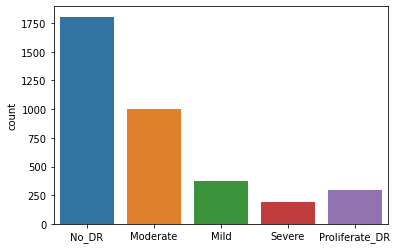

In [ ]:
from numpy import append



train=[]

label=[]
for i in os.listdir('/content/drive/MyDrive/project/diabetic retinopathy/train'):
    train_class=os.listdir(os.path.join('/content/drive/MyDrive/project/diabetic retinopathy/train',i))
    for j in train_class:
        img=os.path.join('train',i,j)
        train.append(img)
        label.append(i)

        
print(f"Number of train images {len(train)}")
sns.countplot(label)



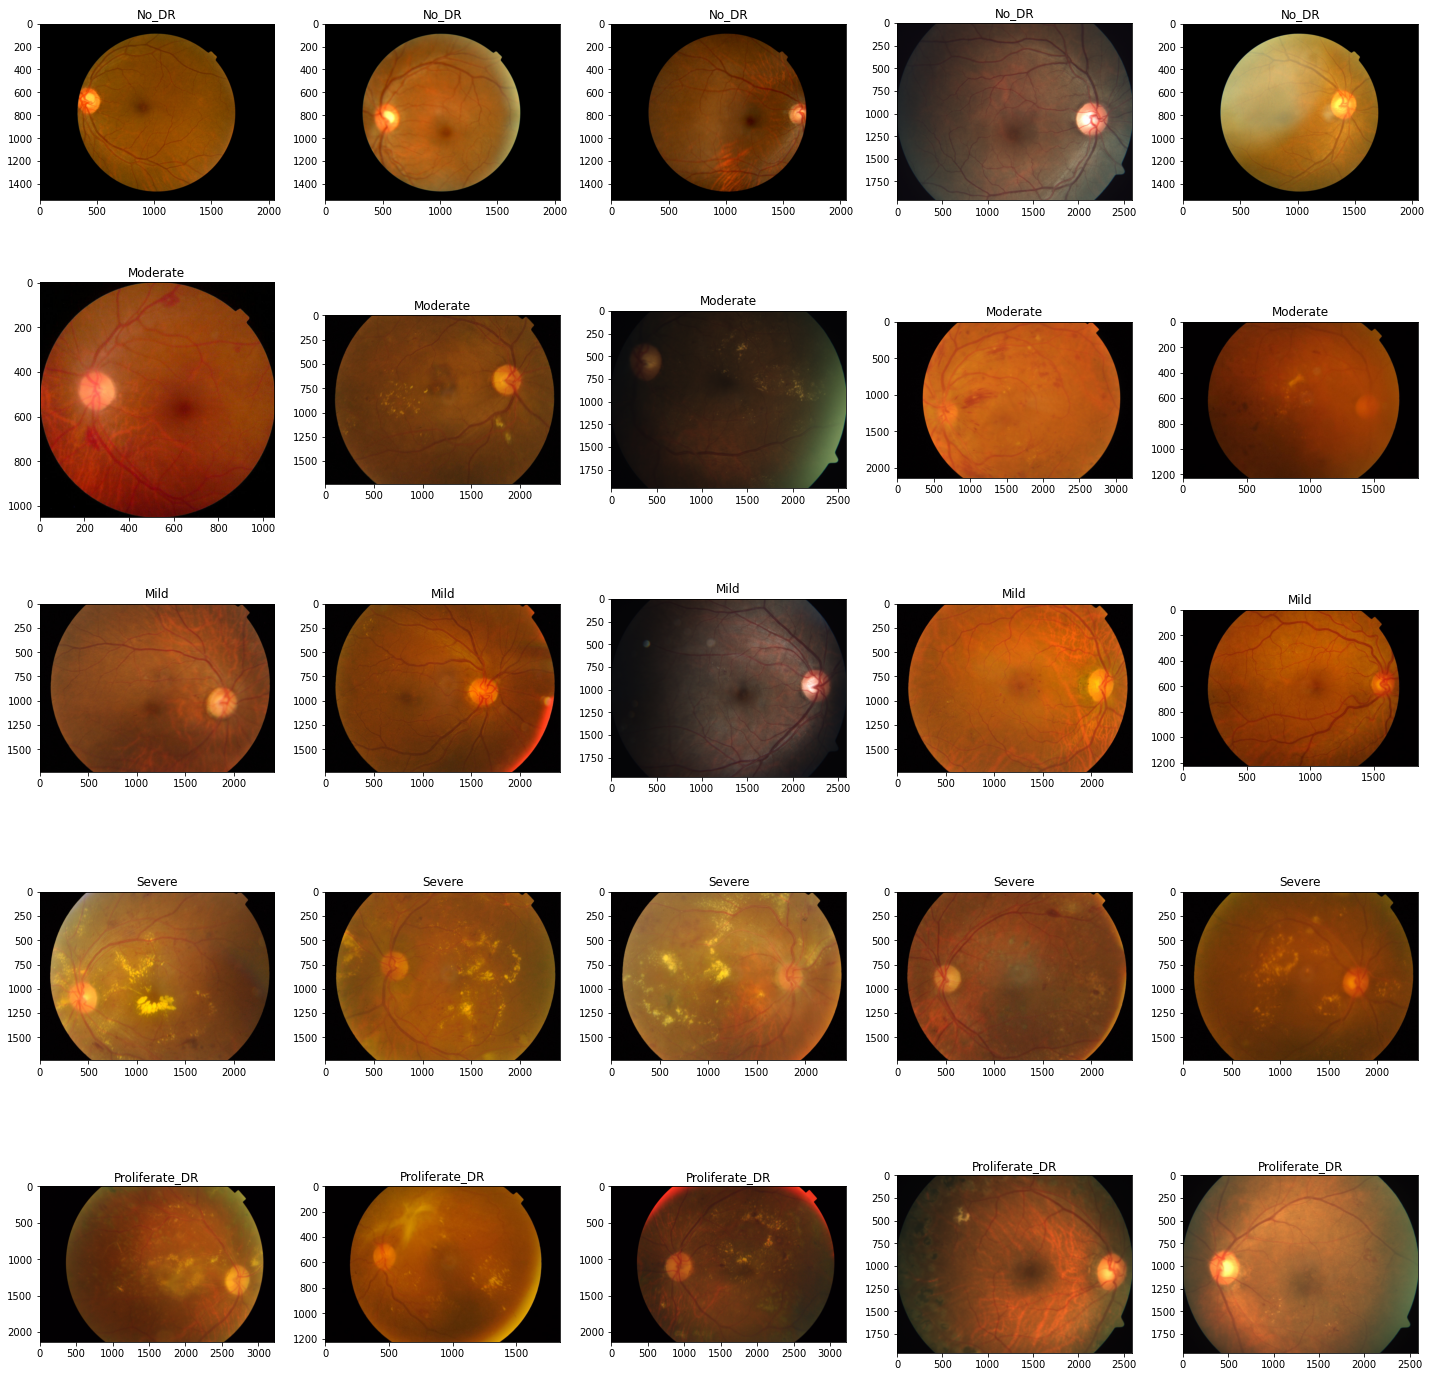

In [ ]:
fig,axs=plt.subplots(5,5,figsize=(20,20))
count=0
for i in os.listdir('/content/drive/MyDrive/project/diabetic retinopathy/train'):
  train_class=os.listdir(os.path.join('/content/drive/MyDrive/project/diabetic retinopathy/train',i))
  for j in range(5):
    img=os.path.join('/content/drive/MyDrive/project/diabetic retinopathy/train',i,train_class[j])
    img=PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)
  count=count+1
fig.tight_layout()


In [ ]:
no_of_images_in_class=[]
class_name=[]
for i in os.listdir('/content/drive/MyDrive/project/diabetic retinopathy/train'):
  train_class=os.listdir(os.path.join('/content/drive/MyDrive/project/diabetic retinopathy/train',i))
  no_of_images_in_class.append(len(train_class))
  class_name.append(i)
  print(f'no of image in {i} is {len(train_class)}')

  

no of image in No_DR is 1805
no of image in Moderate is 999
no of image in Mild is 370
no of image in Severe is 193
no of image in Proliferate_DR is 295


In [ ]:
retina_df=pd.DataFrame({'Image':train,'Labels':label})
retina_df

,Image,Labels
0,train/No_DR/76f3473df8a6.png,No_DR
1,train/No_DR/76bc31e0d3be.png,No_DR
2,train/No_DR/76b950c6ed5e.png,No_DR
3,train/No_DR/77a1f1398fdb.png,No_DR
4,train/No_DR/77e15f213b04.png,No_DR
...,...,...
3657,train/Proliferate_DR/f2d2a0c92034.png,Proliferate_DR
3658,train/Proliferate_DR/f1dc26c4bfa3.png,Proliferate_DR
3659,train/Proliferate_DR/f5e6226bd2e0.png,Proliferate_DR
3660,train/Proliferate_DR/ff8a0b45c789.png,Proliferate_DR


([<matplotlib.patches.Wedge at 0x7fdc4783d710>,
 [Text(0.024533653067266015, 1.0997263749984245, 'No_DR'),
  Text(-0.7565166837496704, -0.7985502534020019, 'Moderate'),
  Text(0.44459236100938765, -1.0061499055966256, 'Mild'),
  Text(0.8610223192730306, -0.6845732727135142, 'Severe'),
  Text(1.0649610805536351, -0.2754231234047608, 'Proliferate_DR')],
 [Text(0.013381992582145097, 0.5998507499991406, '49.3%'),
  Text(-0.4126454638634565, -0.43557286549200097, '27.3%'),
  Text(0.2425049241869387, -0.5488090394163412, '10.1%'),
  Text(0.46964853778528937, -0.37340360329828043, '5.3%'),
  Text(0.5808878621201645, -0.15023079458441493, '8.1%')])

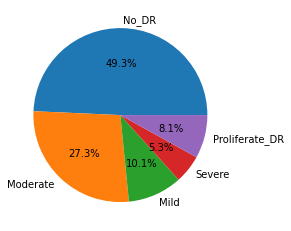

In [ ]:
fig1,ax1=plt.subplots()
ax1.pie(no_of_images_in_class,labels=class_name,autopct='%1.1f%%')


In [ ]:
retina_df=shuffle(retina_df)
train,test=train_test_split(retina_df,test_size=0.2)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        vertical_flip=True,
        validation_split = 0.15)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='/content/drive/MyDrive/project/diabetic retinopathy',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='/content/drive/MyDrive/project/diabetic retinopathy',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='/content/drive/MyDrive/project/diabetic retinopathy',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


# **CNN WITH RESNET**

In [ ]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:

input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

#X = res_block(X, filter= [512,512,2048], stage= 5)

# Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 128, 128, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

# **Training Model**

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
#15
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/project/diabetic retinopathy/weights1.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 50, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

# **performance**

In [ ]:
model.load_weights("/content/drive/MyDrive/project/diabetic retinopathy/retina_weights.hdf5")

In [ ]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 [==============================] - 135s 6s/step - loss: 0.4880 - accuracy: 0.8168
Accuracy Test : 0.8167613744735718


In [ ]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [ ]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
count = 0

for item in range(1):
  # code to open the image
  # img= PIL.Image.open(test['Image'].tolist()[item])
  img= PIL.Image.open('/content/drive/MyDrive/project/diabetic retinopathy/test/severe.png')
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])


1/1 [==============================] - 0s 93ms/step


In [ ]:
# Getting the test accuracy 
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 1.0


In [ ]:
prediction


['Severe']